In [0]:
!wget https://www.dropbox.com/s/y9hooknj3zmeqmw/data.zip

--2020-04-24 13:49:37--  https://www.dropbox.com/s/y9hooknj3zmeqmw/data.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/y9hooknj3zmeqmw/data.zip [following]
--2020-04-24 13:49:37--  https://www.dropbox.com/s/raw/y9hooknj3zmeqmw/data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc667cc70f0a582a9582a5bf7e2f.dl.dropboxusercontent.com/cd/0/inline/A2dDtSFKmVsmcuwX7PY1esh6l9KuO2uvjcD6vryyLly6JQcFCzwP893cqh8wSOhay2QsPWsqNOt7c8nA9tB80bMouuk5LNz5PgxdjKiINhBtI6DTXWo7jOiWCsv8RQVAsTU/file# [following]
--2020-04-24 13:49:38--  https://uc667cc70f0a582a9582a5bf7e2f.dl.dropboxusercontent.com/cd/0/inline/A2dDtSFKmVsmcuwX7PY1esh6l9KuO2uvjcD6vryyLly6JQcFCzwP893cqh8wSOhay2QsPWsqNOt7c8nA9tB80bMouuk5LNz5PgxdjKiINhBtI6DTXWo7jOiWCsv8RQ

In [0]:
!unzip data.zip   

Archive:  data.zip
   creating: data/test/
   creating: data/test/cats/
  inflating: data/test/cats/cat.250.jpg  
  inflating: data/test/cats/cat.251.jpg  
  inflating: data/test/cats/cat.252.jpg  
  inflating: data/test/cats/cat.253.jpg  
  inflating: data/test/cats/cat.254.jpg  
  inflating: data/test/cats/cat.255.jpg  
  inflating: data/test/cats/cat.256.jpg  
  inflating: data/test/cats/cat.257.jpg  
  inflating: data/test/cats/cat.258.jpg  
  inflating: data/test/cats/cat.259.jpg  
  inflating: data/test/cats/cat.260.jpg  
  inflating: data/test/cats/cat.261.jpg  
  inflating: data/test/cats/cat.262.jpg  
  inflating: data/test/cats/cat.263.jpg  
  inflating: data/test/cats/cat.264.jpg  
  inflating: data/test/cats/cat.265.jpg  
  inflating: data/test/cats/cat.266.jpg  
  inflating: data/test/cats/cat.267.jpg  
  inflating: data/test/cats/cat.268.jpg  
  inflating: data/test/cats/cat.269.jpg  
  inflating: data/test/cats/cat.270.jpg  
  inflating: data/test/cats/cat.271.jpg  
  in

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import os

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image

In [0]:
import time

In [0]:
def show_images(images, directory):
    fig, ax = plt.subplots(5)
    i = 0
    
    for img in images[0:5]:
        loaded  = image.load_img('/'.join([directory,img]))
        img_array = image.img_to_array(loaded)
        img_array = img_array/255.0
        plt.rcParams["figure.figsize"] = (20,20)
        ax[i].imshow(img_array)
        ax[i].axis(False)
        i+=1    

In [0]:
def show_image(directory_1,directory_2):

    images = os.listdir(directory_1)
    show_images(images, directory_1)
    
    print(images)
    images = os.listdir(directory_2)
    print(images)
    show_images(images, directory_2)   

['cat.77.jpg', 'cat.62.jpg', 'cat.79.jpg', 'cat.64.jpg', 'cat.58.jpg', 'cat.61.jpg', 'cat.44.jpg', 'cat.89.jpg', 'cat.32.jpg', 'cat.51.jpg', 'cat.60.jpg', 'cat.42.jpg', 'cat.36.jpg', 'cat.70.jpg', 'cat.53.jpg', 'cat.69.jpg', 'cat.85.jpg', 'cat.4.jpg', 'cat.56.jpg', 'cat.43.jpg', 'cat.40.jpg', 'cat.78.jpg', 'cat.90.jpg', 'cat.97.jpg', 'cat.27.jpg', 'cat.13.jpg', 'cat.49.jpg', 'cat.23.jpg', 'cat.68.jpg', 'cat.46.jpg', 'cat.76.jpg', 'cat.15.jpg', 'cat.37.jpg', 'cat.92.jpg', 'cat.91.jpg', 'cat.20.jpg', 'cat.57.jpg', 'cat.88.jpg', 'cat.16.jpg', 'cat.45.jpg', 'cat.59.jpg', 'cat.7.jpg', 'cat.54.jpg', 'cat.21.jpg', 'cat.82.jpg', 'cat.14.jpg', 'cat.22.jpg', 'cat.34.jpg', 'cat.3.jpg', 'cat.9.jpg', 'cat.29.jpg', 'cat.2.jpg', 'cat.73.jpg', 'cat.48.jpg', 'cat.47.jpg', 'cat.87.jpg', 'cat.10.jpg', 'cat.94.jpg', 'cat.75.jpg', 'cat.6.jpg', 'cat.39.jpg', 'cat.96.jpg', 'cat.81.jpg', 'cat.35.jpg', 'cat.84.jpg', 'cat.83.jpg', 'cat.50.jpg', 'cat.19.jpg', 'cat.24.jpg', 'cat.72.jpg', 'cat.26.jpg', 'cat.55.jpg

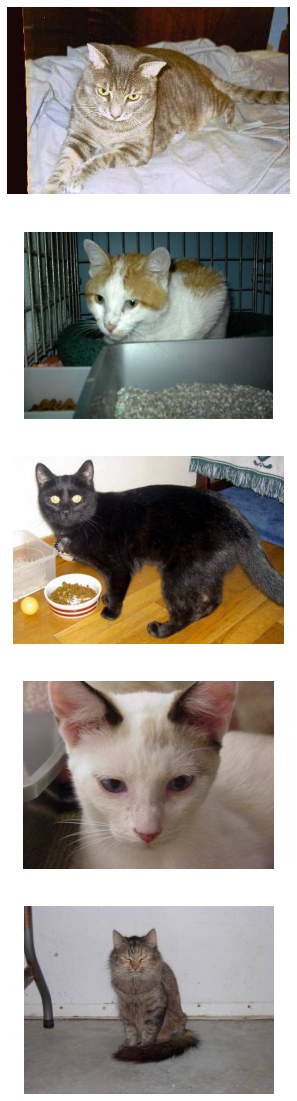

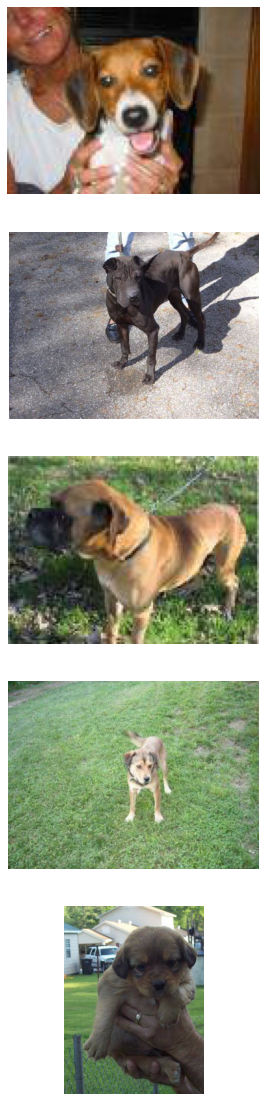

In [0]:
show_image('/'.join([os.getcwd(), 'data/train/cats']),'/'.join([os.getcwd(), 'data/train/dogs']))                     

MANUAL CREATING THE VGG16: HERE 16 IS THE NUM LAYERS THAT HAS TRAINABLE WEIGHTS.

In [0]:
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(rescale=1./255) 
batch_size = 32
direct = '/'.join([os.getcwd(), 'data/train'])
traindata = generator.flow_from_directory(directory=direct,target_size=(224,224), batch_size = batch_size)
tsdata = ImageDataGenerator() 
direct = '/'.join([os.getcwd(), 'data/test'])                                                                                                         
testdata = generator.flow_from_directory(directory= direct, target_size=(224,224),  batch_size = batch_size)
direct = '/'.join([os.getcwd(), 'data/validation'])
valdata = generator.flow_from_directory(directory= direct, target_size=(224,224), batch_size = batch_size)


Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


AS YOU CAN SEE THAT THE The ImageDataGenerator will automatically label all the data inside cat folder as cat 
and inside dog folder as dog

NOTE: TARGET SIZE SHOULD BE SAME AS THE SIZE OF INPUT OF IMAGE. WIDTH, IMAGE HEIGHT OF THE INPUT TAKEN BY THE VGG16 MODEL

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

In [0]:
'''
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
'''

USING THE SAVED MODEL

In [0]:
from keras.applications import VGG16

In [0]:
conv_base.summary()

In [0]:
def extract_features(data):
    iters = int(data.samples/data.batch_size)
    features = []
    labels = []
    for _ in range(iters):
        x,y = data.next()
        features.append(conv_base.predict(x))  
        labels.append(y)

    Features = features[0]
    Labels = labels[0]
    for x,y in zip(features[1:], labels[1:]):
        Features = np.vstack((Features, x))
        Labels = np.vstack((Labels, y))

    return Features,Labels 

VGG16 HAS CREATED WITH IMAGENET WEIGHTS

GETTING THE FEATURES AND LABELS FOR ALL KIND OF DATA

In [0]:
features, labels  = extract_features(traindata)

In [0]:
labels.shape

(168, 2)

In [0]:
validation_features, validation_labels  = extract_features(valdata)

In [0]:
validation_labels.shape

(68, 2)

In [0]:
test_features, test_labels  = extract_features(testdata)

In [0]:
# Define MLP Keras model
from keras import models
from keras import layers
from keras import optimizers

epochs = 100

model = models.Sequential()
model.add(layers.Flatten(input_shape=(7,7,512)))
model.add(layers.Dense(256, activation='relu', input_dim=(7*7*512)))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(2, activation='sigmoid')) 
model.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 514       
Total params: 6,423,298
Trainable params: 6,423,298
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile model
model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

In [0]:
epochs = 20

In [0]:
training = model.fit(features, labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(validation_features, validation_labels))



Train on 168 samples, validate on 68 samples
Epoch 1/100
168/168 [==============================] - 1s 9ms/step - loss: 5.0390 - acc: 0.4762 - val_loss: 5.8646 - val_acc: 0.5147
Epoch 2/100
168/168 [==============================] - 1s 4ms/step - loss: 5.5556 - acc: 0.5417 - val_loss: 6.1609 - val_acc: 0.5000
Epoch 3/100
168/168 [==============================] - 1s 4ms/step - loss: 5.0117 - acc: 0.5744 - val_loss: 4.6718 - val_acc: 0.5882
Epoch 4/100
168/168 [==============================] - 1s 4ms/step - loss: 4.4925 - acc: 0.6369 - val_loss: 4.0008 - val_acc: 0.6765
Epoch 5/100
168/168 [==============================] - 1s 4ms/step - loss: 1.8812 - acc: 0.7083 - val_loss: 2.3197 - val_acc: 0.5588
Epoch 6/100
168/168 [==============================] - 1s 4ms/step - loss: 1.3378 - acc: 0.7351 - val_loss: 1.1317 - val_acc: 0.6765
Epoch 7/100
168/168 [==============================] - 1s 4ms/step - loss: 0.6561 - acc: 0.8006 - val_loss: 0.7388 - val_acc: 0.7206
Epoch 8/100
168/168 [=

In [0]:
def show_the_prediction(model, n):
    fig, ax = plt.subplots(n)
    i = 0
    for i in range(n):
        d = '/'.join([os.getcwd(), 'data/test'])
        call = np.random.choice(['cats', 'dogs'])
        choices  = os.listdir(d+ '/' + call)
        #print(choices)
        img = np.random.choice(choices)
        #print(img)
        img = image.load_img('/'.join([d+ '/' + call,img]), target_size= (224,224))
        img = image.img_to_array(img)/255.0
        features = conv_base.predict(img.reshape(1,img_width, img_height, 3))   

        ax[i].imshow(img)

        
        time.sleep(5)
        label = np.argmax(model.predict_proba(features)[0])
        #print(label)
        i+=1
        if label == 1:
            ax[i].tilte('Dog')
        else:
            ax[i].tilte('Cat')


Dog
Cat
Dog
Cat
Cat


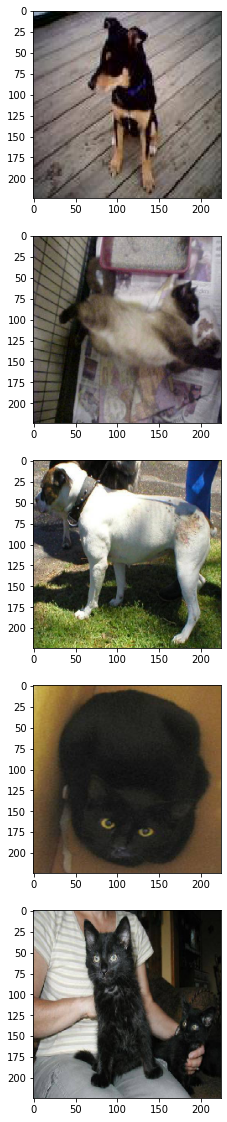

In [0]:
show_the_prediction(model, 5) 

### ***All the Images has Classified Correctly as Shown Above***

---

